In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os 
from glob import glob

## Exploring the results of ParFam vs DL-ParFam

In [2]:
files = {50: ['20230811_152333_results_iter_50.csv', '20230811_155210_results_iter_50.csv', 
              '20230811_162935_results_iter_50.csv'], 
        100: ['20230809_163746_results_iter_100.csv', '20230809_172056_results_iter_100.csv',
             '20230811_144228_results_iter_100.csv'],
        500: ['20230809_171749_results_iter_500.csv', '20230810_095849_results_iter_500.csv',
             '20230812_000614_results_iter_500.csv'],
        1000: ['20230809_125708_results_iter_1000.csv', '20230809_142011_results_iter_1000.csv',
              '20230811_170837_results_iter_1000.csv']}

In [3]:
results_list = []
for key in files.keys():
    for file in files[key]:
        result = pd.read_csv(file, index_col=0)
        result['iter'] = key
        results_list.append(result)

In [4]:
results = pd.concat(results_list)
results_avg = results.groupby(['classifier', 'iter'], as_index=False).mean()
results_avg

,classifier,iter,rel_l2_distance,success,training_time
0,False,50,0.271440,0.32,12.661418
1,False,100,0.303898,0.30,24.465190
2,False,500,0.190862,0.43,748.221433
3,False,1000,0.226762,0.37,220.583152
4,True,50,0.249856,0.48,6.882555
5,True,100,0.249994,0.46,11.906587
6,True,500,0.131505,0.66,55.479544
7,True,1000,0.110687,0.69,106.897338


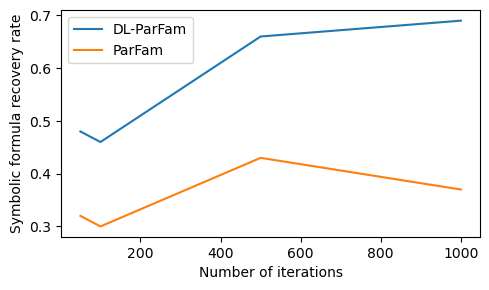

In [5]:
results_avg_class = results_avg[results_avg['classifier']]
results_avg_standard = results_avg[~ results_avg['classifier']]
plt.figure(figsize=(5, 3))
plt.plot(results_avg_class['iter'], results_avg_class['success'], label='DL-ParFam')
plt.plot(results_avg_standard['iter'], results_avg_standard['success'], label='ParFam')
plt.xlabel('Number of iterations')
plt.ylabel('Symbolic formula recovery rate')
plt.legend()
plt.tight_layout()

In [6]:
results[results['training_time'] < 10000].groupby(['classifier', 'iter'], as_index=False).mean()

,classifier,iter,rel_l2_distance,success,training_time
0,False,50,0.271440,0.320000,12.661418
1,False,100,0.295852,0.300000,24.465190
2,False,500,0.217638,0.423729,115.663396
3,False,1000,0.227689,0.350000,220.583152
4,True,50,0.249856,0.480000,6.882555
5,True,100,0.287056,0.433333,11.906587
6,True,500,0.149921,0.683333,55.479544
7,True,1000,0.136279,0.666667,106.897338


In [7]:
results.columns

Index(['formula', 'classifier', 'rel_l2_distance', 'success',
       'estimated_formula', 'training_time', 'iter'],
      dtype='object')

## The synthetic dataset

In [8]:
import sympy
import numpy as np
np.random.seed(12345)
formulas = results.groupby('formula').first().sample(frac=1).index
for i, formula in enumerate(formulas[:20]):
    formula = formula.replace('x0', 'x')
    print(f'{i+1}. & $y={sympy.latex(sympy.parse_expr(formula))}$ \\\\ \\hline')

1. & $y=1.357 \sin{\left(4.072 x^{2} + 1.044 \right)}$ \\ \hline
2. & $y=- 2.909 x \sin{\left(8.746 x^{2} - 1.637 x + 0.72 \right)} + 2.591$ \\ \hline
3. & $y=4.131 x \sin{\left(1.933 x^{2} - 0.549 x + 3.205 \right)} - 2.847 \sin{\left(1.933 x^{2} - 0.549 x + 3.205 \right)} \sqrt{\left|{1.344 x + 1.678}\right|}$ \\ \hline
4. & $y=0.771 x \sqrt{\left|{3.293 x^{2} + 0.878 x + 1.837}\right|} + 3.64 \sin{\left(0.824 x^{2} - 8.78 x + 1.936 \right)}$ \\ \hline
5. & $y=- 1.375 x$ \\ \hline
6. & $y=- 6.339 x \sin{\left(6.961 x \right)} + 2.891$ \\ \hline
7. & $y=0.944 x \sin{\left(2.042 x^{2} + 5.451 x + 3.97 \right)} + 0.548 x$ \\ \hline
8. & $y=- 3.907 x \sin{\left(5.384 x^{2} \right)} + 2.681 \sin{\left(5.384 x^{2} \right)} \sqrt{\left|{0.276 x^{2} + 2.406 x - 1.149}\right|}$ \\ \hline
9. & $y=4.276 x + 2.025 \sin{\left(3.93 x \right)}$ \\ \hline
10. & $y=- 3.00775414005201 x \sqrt{\left|{x^{2}}\right|} - 2.751 \sin{\left(0.231 x^{2} - 1.3 \right)}$ \\ \hline
11. & $y=- 2.189 x^{2} - 2.828 

## The classifier network

In [45]:
df_sum.columns

Index(['algorithm', 'dataset', 'target_noise', 'data_group', 'random_state',
       'process_time', 'training time (s)', 'feature_noise', 'model_size',
       'mse_train', 'mae_train', 'r2_train', 'mse_test', 'mae_test', 'r2_test',
       'simplified_complexity', 'symbolic_error_is_zero',
       'symbolic_error_is_constant', 'symbolic_fraction_is_constant',
       'training time (hr)', 'r2_zero_test', 'symbolic_solution',
       'algorithm_count', 'random_state_repeats', 'accuracy_solution',
       'accuracy_solution_rate', 'symbolic_solution_rate',
       'model_size_rank_per_trial', 'mse_test_rank_per_trial',
       'mae_test_rank_per_trial', 'r2_test_rank_per_trial',
       'r2_zero_test_rank_per_trial', 'model_size_rank', 'model_size_norm',
       'mse_test_rank', 'mse_test_norm', 'mae_test_rank', 'mae_test_norm',
       'r2_test_rank', 'r2_test_norm', 'r2_zero_test_rank',
       'r2_zero_test_norm', 'accuracy_solution_rate_rank',
       'accuracy_solution_rate_norm', 'symbolic_sol

In [18]:
os.chdir(os.path.dirname(os.getcwd()))

In [22]:
import torch
from utils import create_dataset
dataset_size = 2000000
hidden_neurons = 200
n_batches = 500
net_path = (f'trainingOnSyntheticData/results/20230807_213046_train/model_training_set_size_{dataset_size}_hidden_neurons_{hidden_neurons}_n_batches_{n_batches}.pt')

net = torch.load(net_path, map_location=torch.device('cpu'))

In [35]:
test_set_size = 10000
functions = [torch.sin, lambda x: torch.sqrt(torch.abs(x))]
function_names = [sympy.sin, lambda x: sympy.sqrt(sympy.Abs(x))]
degree_output_polynomials = 2
degree_input_polynomials = 2
width = 1
degree_output_polynomials_specific = [1, 1]
degree_output_denominator = 0
degree_input_denominator = 0
enforce_function = False
n_functions_max = 2

iter_standard = 2000
iter_classifier = 2000
iter2 = 0
optimizer = 'basinhopping'
lambda_1 = 0.001
accuracy = 0.0001

torch.manual_seed(1234)
np.random.seed(1234)
y, a, params = create_dataset(test_set_size, True, degree_input_polynomials,
                              degree_output_polynomials,
                              width, functions, function_names, device='cpu', normalization=False,
                              degree_output_polynomials_specific=degree_output_polynomials_specific,
                              enforce_function=enforce_function, n_functions_max=n_functions_max)
successes_standard = 0

/home/philipp/projects/phyiscalLawLearning/ForNet/ParFamTorch/utils.py:263: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y, dtype=torch.float, device=device)


In [36]:
y.shape

torch.Size([10000, 200])

In [37]:
def evaluate_covering(y, a_target, name, quantile, net):
    # Get the score of how many formulas got a complete covering (all important coefficients have been marked as
    # important).
    # Furthermore, calculate the average number of coefficients, in the case that a full covering has been reached.
    prediction = net(y).cpu().detach().numpy()
    if quantile:
        cutoff = np.quantile(prediction, 0.7)
        description = 'quantile cutoff'
    else:
        cutoff = 0.2
        description = '0.2 cutoff'
    a_pred = (prediction > cutoff).astype(int)
    a_target = a_target.cpu().detach().numpy().squeeze(-1)

    complete_coverings = np.sum(a_target > a_pred, axis=1) == 0
    covering_score = np.round(sum(complete_coverings) / y.shape[0], decimals=5)

    print(f'Covering score ({name} data) ({description}): {covering_score}')

    coverings = a_pred[complete_coverings]
    avg_complete_cover_size = coverings.mean()

    print(f'Complete cover size ({name} data) ({description}): {avg_complete_cover_size}')

In [38]:
evaluate_covering(y, a, 'test', False, net)

Covering score (test data) (0.2 cutoff): 0.9132
Complete cover size (test data) (0.2 cutoff): 0.26615199299167763
